In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt

In [2]:
 X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1) # to add some noise to the data
y_clean = 4 + 3 * X

In [3]:
GD_model = SGDRegressor(max_iter=1000, eta0=0.001)
GD_model.fit(X, y.squeeze())

SGDRegressor(eta0=0.001)

In [4]:
y_hat = GD_model.predict(X)

In [5]:
GD_model.intercept_, GD_model.coef_

(array([3.44516167]), array([3.4909199]))

In [8]:
mean_squared_error(y, y_hat)

1.0312380585570902

In [9]:
 GD_model.n_iter_no_change

5

In [10]:
X_b = np.linspace(X.min(), X.max(), 10).reshape(-1, 1)

In [11]:
def model_ex(max_iter=0, lr=0, line_style=None):
    _model = SGDRegressor(max_iter=max_iter, eta0=lr)
    _model_fit = _model.fit(X, y)
    _y_hat = _model_fit.predict(X)
    mse = mean_squared_error(y_clean, _y_hat)
    print(f"MSE: {mse}")
    _y_hat_b = _model_fit.predict(X_b)
    line_style["label"] += f" - MSE={mse:0.4f}"
    plt.plot(X_b, _y_hat_b, **line_style)

/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


MSE: 1.8278038232657123


/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


MSE: 0.27153729338180016


/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.08170078455302607


/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.082160458485983


/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.08126877988570112


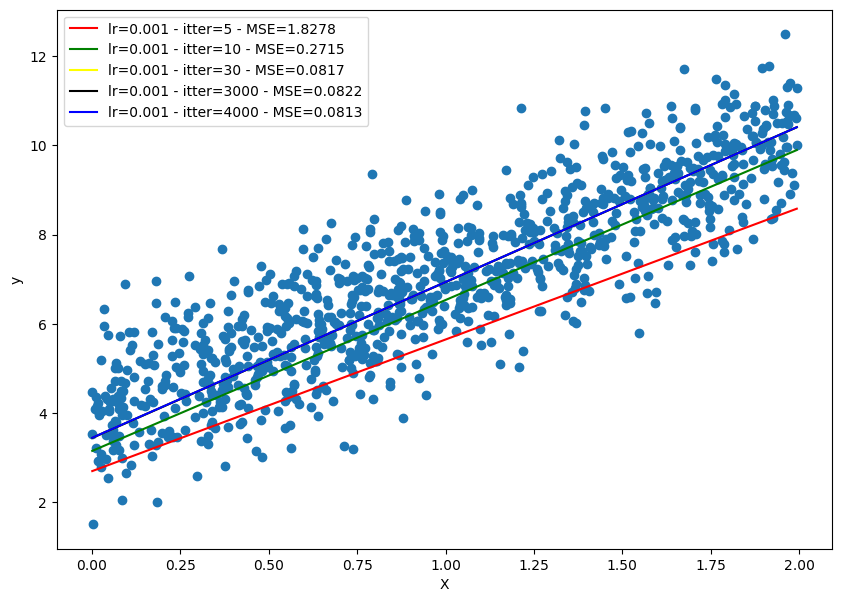

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(X, y)
plt.ylabel("y")
plt.xlabel("X")
# # plt.plot(X_b, y_hat_b)
model_ex(5, 0.001, {"color":"red", "label":"lr=0.001 - itter=5"})
model_ex(10, 0.001, {"color":"green", "label":"lr=0.001 - itter=10"})
model_ex(30, 0.001, {"color":"yellow", "label":"lr=0.001 - itter=30"})
model_ex(3000, 0.001, {"color":"black", "label":"lr=0.001 - itter=3000"})
model_ex(4000, 0.001, {"color":"blue", "label":"lr=0.001 - itter=4000"})
plt.legend()